In [172]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

In [173]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'

In [174]:
df = pd.read_csv(url, index_col='rowid')

In [175]:
df.reset_index(drop = True, inplace=True)

## Primer Análisis 

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [177]:
df.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


In [178]:
df.shape

(344, 8)

In [179]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [180]:
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [181]:
def box_plot(data):
    plt.figure(figsize=(20,4))
    sns.boxplot(data, orient='h')

    media = data.mean()
    mediana = data.median()

    plt.axvline(media, color = 'r', linestyle = 'dashed', linewidth = 1)
    plt.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 1)
    plt.show()

In [182]:
def box_plot_conjunto(data):
    for columna in data.columns:
        print(f"Variable {columna}")
        print(data[columna].describe())
        plt.figure(figsize=(20,4))
        sns.boxplot(data[columna], orient='h')
        media = data[columna].mean()
        mediana = data[columna].median()

        plt.axvline(media, color = 'r', linestyle = 'dashed', linewidth = 1)
        plt.axvline(mediana, color = 'g', linestyle = 'dashed', linewidth = 1)

        plt.show()

In [183]:
df_sin_nulos = df.dropna()

In [184]:
df_numerico_sn = df_sin_nulos.select_dtypes(include='number')

Variable bill_length_mm
count    333.000000
mean      43.992793
std        5.468668
min       32.100000
25%       39.500000
50%       44.500000
75%       48.600000
max       59.600000
Name: bill_length_mm, dtype: float64


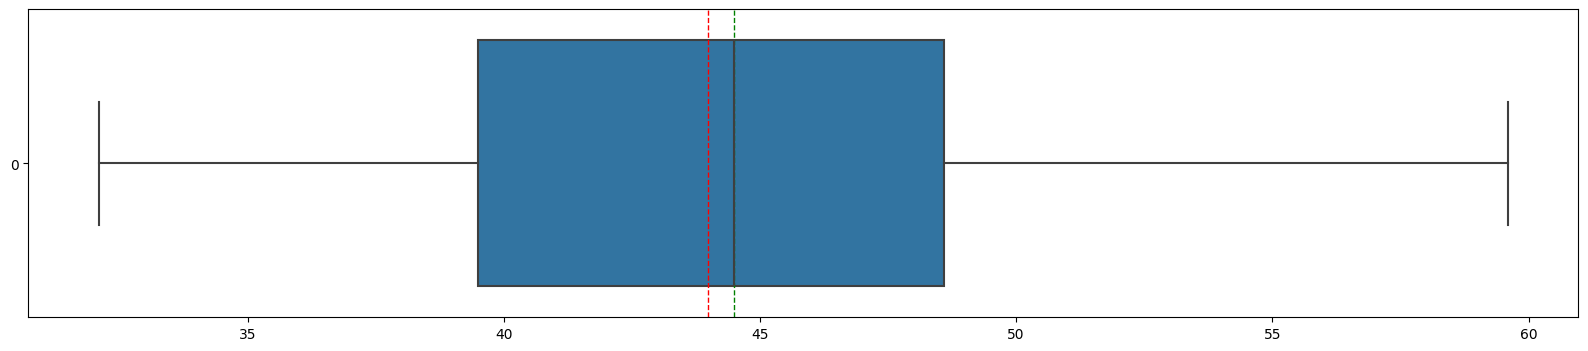

Variable bill_depth_mm
count    333.000000
mean      17.164865
std        1.969235
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: bill_depth_mm, dtype: float64


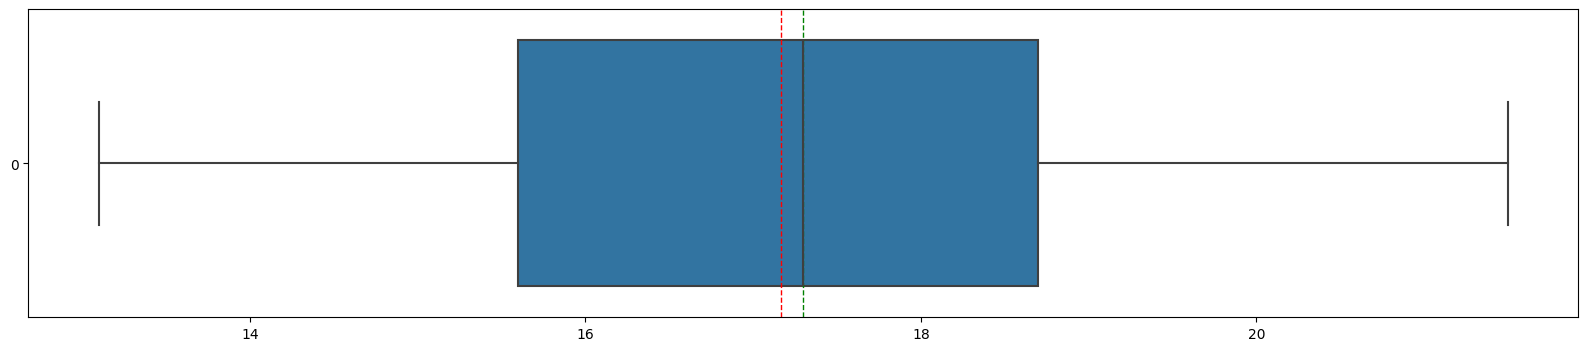

Variable flipper_length_mm
count    333.000000
mean     200.966967
std       14.015765
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64


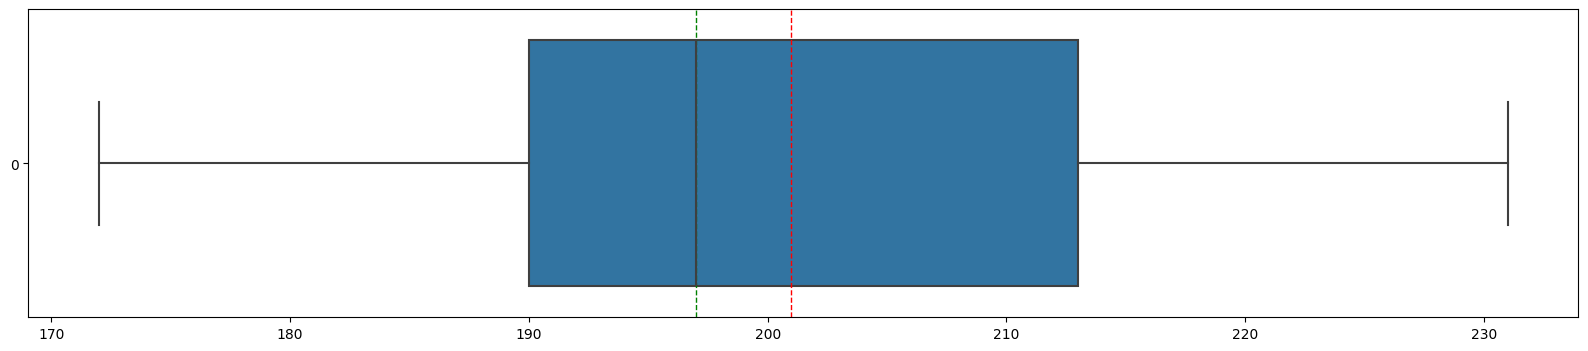

Variable body_mass_g
count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64


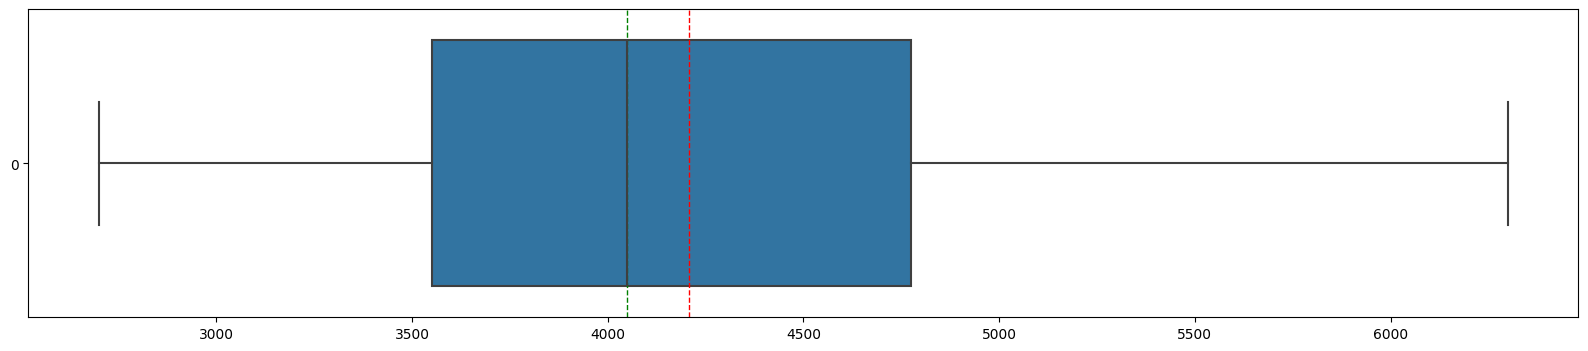

Variable year
count     333.000000
mean     2008.042042
std         0.812944
min      2007.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2009.000000
Name: year, dtype: float64


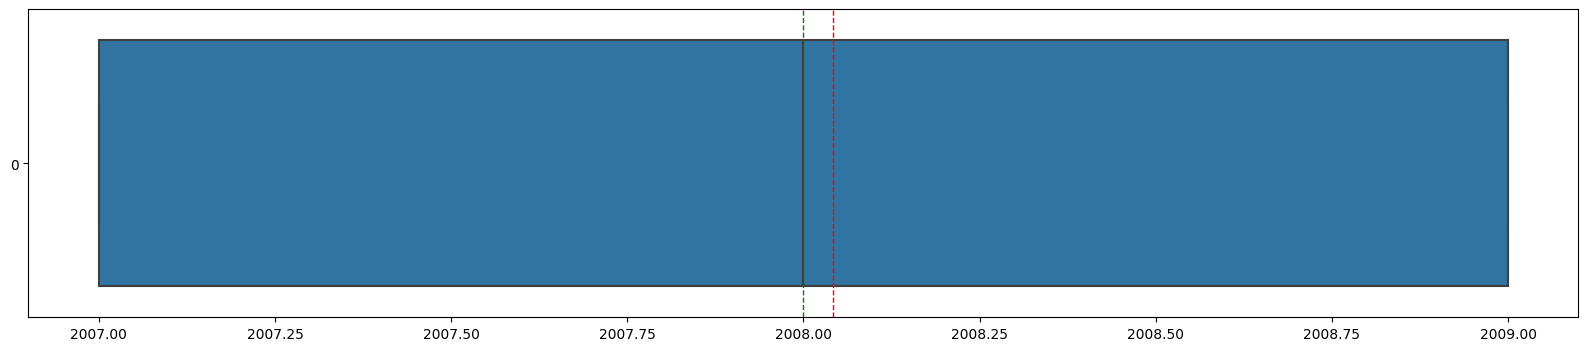

In [185]:
box_plot_conjunto(df_numerico_sn)

In [186]:
def graficos_variables_cualit(data):
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")
            if len(data[columna].dropna().unique()) > 1:
                ax = sns.countplot(data= data.sort_values(by=columna), x= columna, palette='husl')
                ax.set_xticklabels(data[columna].sort_values().unique(), rotation=90)
                plt.title(f"Conteo variable {columna}")
                plt.show();
            else:
                print('No es necesario graficar porque tiene un solo valor dentro de la columna')
            print(data[columna].value_counts())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

----------------------------------------------------------------------------------------------------
VARIABLE: species



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


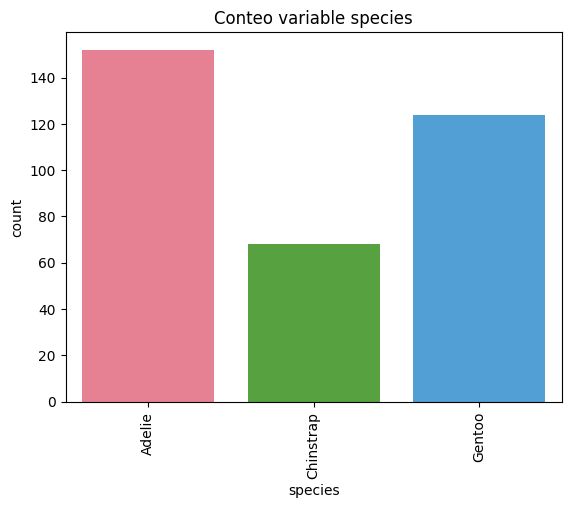

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: island



c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


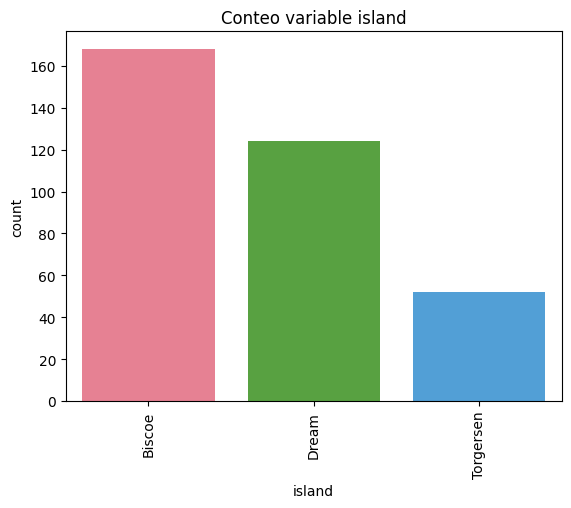

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: sex

No puedo analizar la variable por este error The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).


c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


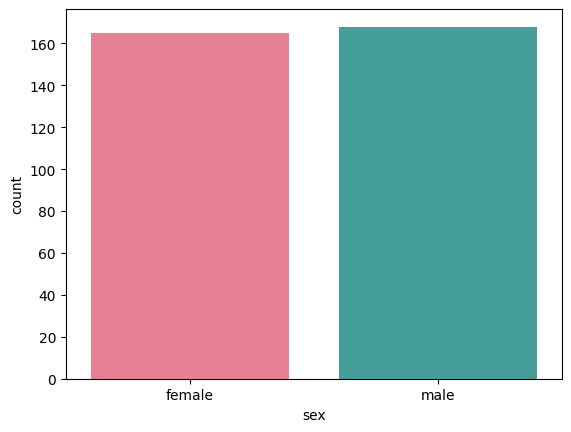

In [187]:
graficos_variables_cualit(df.select_dtypes(exclude='number'))

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

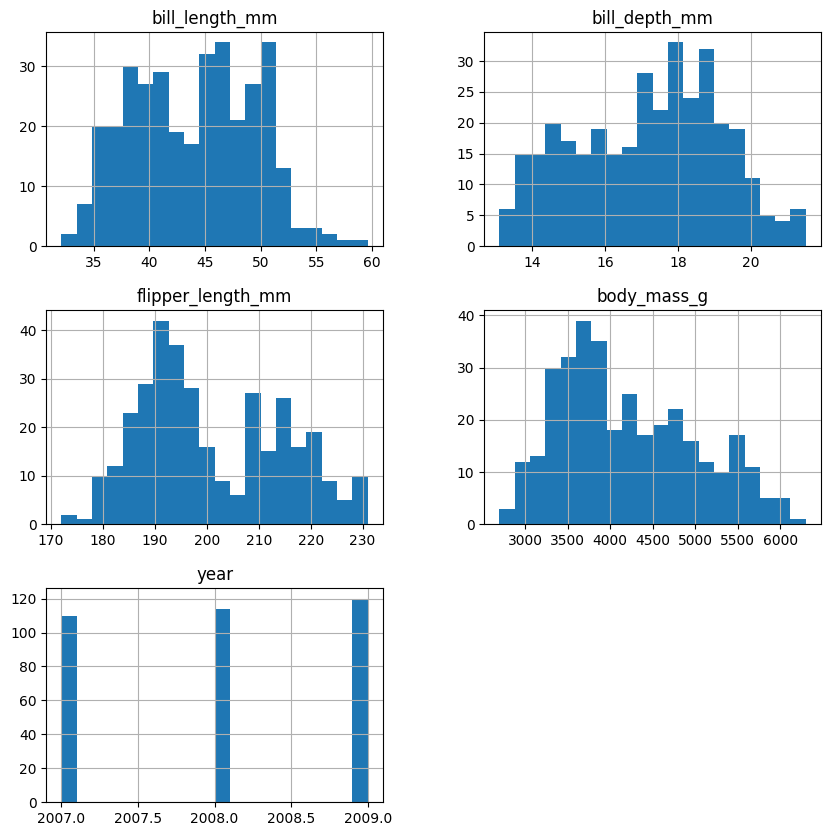

In [188]:
df.hist(bins=20, figsize=(10,10))

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

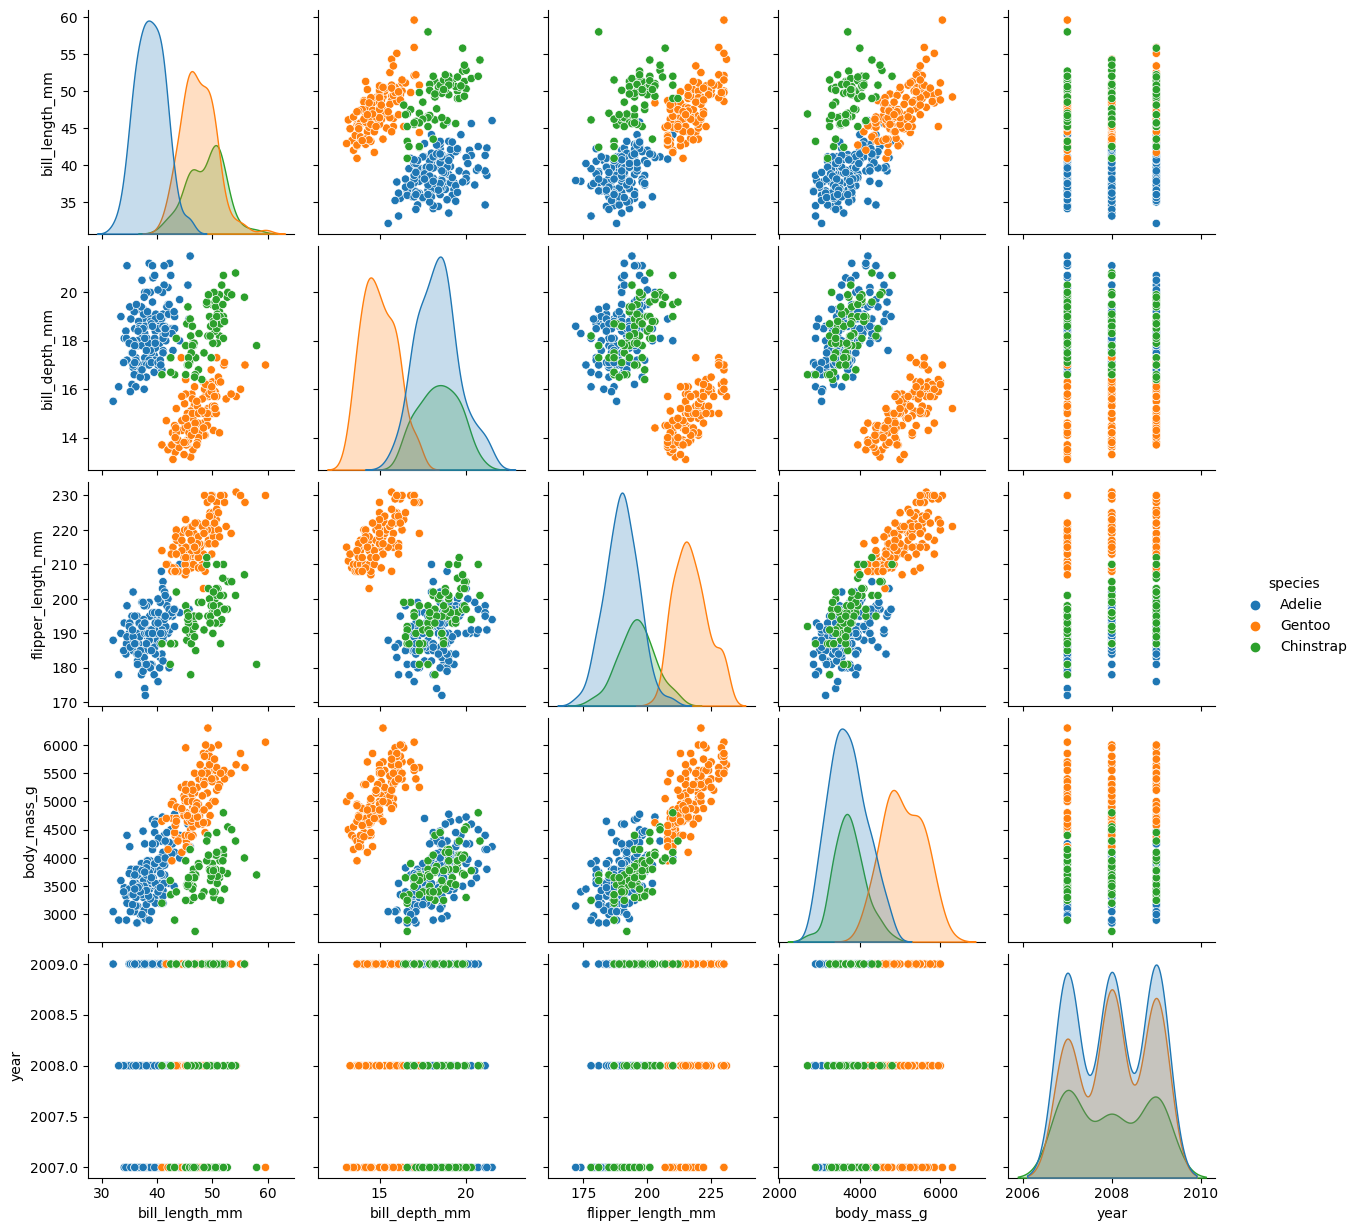

In [189]:
sns.pairplot(df, hue = 'species')

In [190]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [191]:
df.replace({'Adelie': 0, 'Gentoo':1, 'Chinstrap':2, 'Torgersen':0, 'Biscoe':1, 'Dream':2}).corr(numeric_only=True)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,1.000000,0.455317,0.779857,-0.183090,0.357472,0.209717,-0.007279
island,0.455317,1.000000,0.223106,0.179753,-0.145432,-0.189074,-0.000484
bill_length_mm,0.779857,0.223106,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.183090,0.179753,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.357472,-0.145432,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.209717,-0.189074,0.595110,-0.471916,0.871202,1.000000,0.042209
year,-0.007279,-0.000484,0.054545,-0.060354,0.169675,0.042209,1.000000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [193]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [194]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())

In [195]:
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())

In [196]:
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].median())

In [197]:
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].median())

In [198]:
df['sex'] = df['sex'].fillna(df['sex'].mode().iloc[0])

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


## Dividimos el modelo

In [200]:
X_train, y_test = train_test_split(df, test_size = 0.20, random_state = 42)

In [201]:
X_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#### Encoded los datos de train

In [202]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded = enc.fit_transform(X_train[['sex']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['sex']))

X_train_encoded = pd.concat([X_train, encoded_df], axis=1)
X_train_encoded.drop(['sex'], axis=1, inplace=True)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [203]:
X_train_encoded

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,Adelie,Biscoe,35.5,16.2,195.0,3350.0,2008,1.0,0.0
1,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,2008,0.0,1.0
2,Adelie,Torgersen,39.2,19.6,195.0,4675.0,2007,0.0,1.0
3,Adelie,Dream,40.2,17.1,193.0,3400.0,2009,1.0,0.0
4,Chinstrap,Dream,49.0,19.6,212.0,4300.0,2009,0.0,1.0
...,...,...,...,...,...,...,...,...,...
270,Gentoo,Biscoe,42.6,13.7,213.0,4950.0,2008,1.0,0.0
271,Adelie,Torgersen,39.7,18.4,190.0,3900.0,2008,0.0,1.0
272,Adelie,Biscoe,38.6,17.2,199.0,3750.0,2009,1.0,0.0
273,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009,1.0,0.0


#### Encoded los datos de validation

In [204]:
encoded = enc.transform(y_test[['sex']])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(['sex']))

y_test_encoded = pd.concat([y_test, encoded_df], axis=1)
y_test_encoded.drop(['sex'], axis=1, inplace=True)

In [205]:
y_test_encoded.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,Gentoo,Biscoe,45.3,13.7,210.0,4300.0,2008,1.0,0.0
1,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,2007,1.0,0.0
2,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,2008,1.0,0.0
3,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,2008,1.0,0.0
4,Chinstrap,Dream,50.9,19.1,196.0,3550.0,2008,0.0,1.0


#### Label encorder

In [206]:
lb = LabelEncoder()
X_train_encoded['island'] = lb.fit_transform(X_train_encoded[['island']])

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [207]:
X_train_encoded

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,Adelie,0,35.5,16.2,195.0,3350.0,2008,1.0,0.0
1,Gentoo,0,51.1,16.3,220.0,6000.0,2008,0.0,1.0
2,Adelie,2,39.2,19.6,195.0,4675.0,2007,0.0,1.0
3,Adelie,1,40.2,17.1,193.0,3400.0,2009,1.0,0.0
4,Chinstrap,1,49.0,19.6,212.0,4300.0,2009,0.0,1.0
...,...,...,...,...,...,...,...,...,...
270,Gentoo,0,42.6,13.7,213.0,4950.0,2008,1.0,0.0
271,Adelie,2,39.7,18.4,190.0,3900.0,2008,0.0,1.0
272,Adelie,0,38.6,17.2,199.0,3750.0,2009,1.0,0.0
273,Gentoo,0,47.2,13.7,214.0,4925.0,2009,1.0,0.0


In [208]:
y_test_encoded['island'] = lb.transform(y_test_encoded[['island']])

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [209]:
y_test_encoded.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,Gentoo,0,45.3,13.7,210.0,4300.0,2008,1.0,0.0
1,Gentoo,0,46.5,13.5,210.0,4550.0,2007,1.0,0.0
2,Gentoo,0,46.5,14.8,217.0,5200.0,2008,1.0,0.0
3,Gentoo,0,43.8,13.9,208.0,4300.0,2008,1.0,0.0
4,Chinstrap,1,50.9,19.1,196.0,3550.0,2008,0.0,1.0


Mapeo para tranformar los valores de especie

In [210]:
mapeo = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}
X_train_encoded['species'] = X_train_encoded['species'].map(mapeo)

In [211]:
mapeo = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}
y_test_encoded['species'] = y_test_encoded['species'].map(mapeo)

In [212]:
X_train_encoded

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,1,0,35.5,16.2,195.0,3350.0,2008,1.0,0.0
1,3,0,51.1,16.3,220.0,6000.0,2008,0.0,1.0
2,1,2,39.2,19.6,195.0,4675.0,2007,0.0,1.0
3,1,1,40.2,17.1,193.0,3400.0,2009,1.0,0.0
4,2,1,49.0,19.6,212.0,4300.0,2009,0.0,1.0
...,...,...,...,...,...,...,...,...,...
270,3,0,42.6,13.7,213.0,4950.0,2008,1.0,0.0
271,1,2,39.7,18.4,190.0,3900.0,2008,0.0,1.0
272,1,0,38.6,17.2,199.0,3750.0,2009,1.0,0.0
273,3,0,47.2,13.7,214.0,4925.0,2009,1.0,0.0


In [213]:
y_test_encoded.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male
0,3,0,45.3,13.7,210.0,4300.0,2008,1.0,0.0
1,3,0,46.5,13.5,210.0,4550.0,2007,1.0,0.0
2,3,0,46.5,14.8,217.0,5200.0,2008,1.0,0.0
3,3,0,43.8,13.9,208.0,4300.0,2008,1.0,0.0
4,2,1,50.9,19.1,196.0,3550.0,2008,0.0,1.0


#### Escalamos los datos train

In [214]:
scaler_1 = MinMaxScaler()

train_escalado = X_train_encoded[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
train_t_array = scaler_1.fit_transform(train_escalado)
X_train_elbs = pd.DataFrame(train_t_array, columns=X_train_encoded[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].columns)

X_train_elbsc = pd.concat([X_train_elbs, X_train_encoded[['island', 'year', 'sex_female', 'sex_male', 'species']]], axis=1)

X_train_elbsc

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,year,sex_female,sex_male,species
0,0.123636,0.369048,0.389831,0.180556,0,2008,1.0,0.0,1
1,0.690909,0.380952,0.813559,0.916667,0,2008,0.0,1.0,3
2,0.258182,0.773810,0.389831,0.548611,2,2007,0.0,1.0,1
3,0.294545,0.476190,0.355932,0.194444,1,2009,1.0,0.0,1
4,0.614545,0.773810,0.677966,0.444444,1,2009,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...
270,0.381818,0.071429,0.694915,0.625000,0,2008,1.0,0.0,3
271,0.276364,0.630952,0.305085,0.333333,2,2008,0.0,1.0,1
272,0.236364,0.488095,0.457627,0.291667,0,2009,1.0,0.0,1
273,0.549091,0.071429,0.711864,0.618056,0,2009,1.0,0.0,3


In [215]:
test_escalado = y_test_encoded[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
test_t_array = scaler_1.transform(test_escalado)
y_test_elbs = pd.DataFrame(test_t_array, columns=y_test_encoded[['bill_length_mm','bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].columns)

y_test_elbsc = pd.concat([y_test_elbs, y_test_encoded[['island', 'year', 'sex_female', 'sex_male', 'species']]], axis=1)

y_test_elbsc

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,year,sex_female,sex_male,species
0,0.480000,0.071429,0.644068,0.444444,0,2008,1.0,0.0,3
1,0.523636,0.047619,0.644068,0.513889,0,2007,1.0,0.0,3
2,0.523636,0.202381,0.762712,0.694444,0,2008,1.0,0.0,3
3,0.425455,0.095238,0.610169,0.444444,0,2008,1.0,0.0,3
4,0.683636,0.714286,0.406780,0.236111,1,2008,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...
64,0.680000,0.642857,0.491525,0.486111,1,2009,0.0,1.0,2
65,0.658182,0.142857,0.779661,0.833333,0,2007,0.0,1.0,3
66,0.498182,0.690476,0.423729,0.402778,2,2008,0.0,1.0,1
67,0.320000,0.440476,0.322034,0.277778,2,2008,1.0,0.0,1


## Seleccion de modelo

In [217]:
X_train = X_train_elbsc.drop(columns = ['species'], axis=1)
y_train = X_train_elbsc[['species']].copy()

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, \
accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score

model_0 = SVC()
model_1 = LogisticRegression()

In [218]:
models = [model_0, model_1]
metricas = ['accuracy', "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]
dicc = {}

for i in models:
    for a in metricas:
        scores = cross_val_score(i, X_train, y_train, cv=10, scoring=a)
        media = scores.mean()
        estandar = scores.std()
        clave = f"{i}- {a}"

        dicc[clave] = media

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

In [219]:
pd.DataFrame([dicc]).T

,0
SVC()- accuracy,0.436508
SVC()- f1_macro,0.202564
SVC()- recall_macro,0.333333
SVC()- precision_macro,0.145503
SVC()- roc_auc_ovr,NaN
LogisticRegression()- accuracy,0.967196
LogisticRegression()- f1_macro,0.959929
LogisticRegression()- recall_macro,0.950556
LogisticRegression()- precision_macro,0.976823
LogisticRegression()- roc_auc_ovr,0.999271


In [220]:
model_1.fit(X_train, y_train)

c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ortiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Nso llevamos el valor de Y_TEST

In [221]:
X_test = y_test_elbsc.drop(columns = ['species'], axis=1)
y_test = y_test_elbsc[['species']].copy()

In [222]:
predicc = model_1.predict(X_test)
predicc

array([3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1,
       1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 2, 3,
       1, 1, 1], dtype=int64)

In [231]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix

In [224]:
accuracy_score(y_test,predicc)

0.927536231884058

Modelo de Clasificación

In [227]:
print(classification_report(y_test, predicc))

              precision    recall  f1-score   support

           1       0.89      0.97      0.93        32
           2       1.00      0.69      0.82        13
           3       0.96      1.00      0.98        24

    accuracy                           0.93        69
   macro avg       0.95      0.89      0.91        69
weighted avg       0.93      0.93      0.92        69



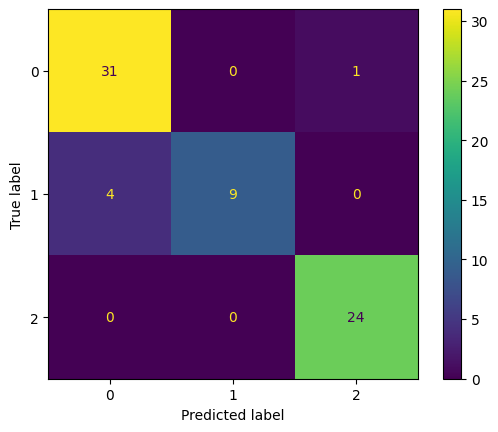

In [230]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predicc)).plot()

Te da los valores para hacer predicciones como recall, precision, accuracy, etc. 

In [232]:
multilabel_confusion_matrix(y_test, predicc)

array([[[33,  4],
        [ 1, 31]],

       [[56,  0],
        [ 4,  9]],

       [[44,  1],
        [ 0, 24]]], dtype=int64)

### Interceptos

Entre más pequeños son los interceptos, es mejor tiene menos error porque esta mas cerca de cero

In [233]:
print(model_1.intercept_)
print(model_1.coef_)

[-0.00061024  0.00096115 -0.00035091]
[[-4.23825607e+00  9.54344149e-01 -1.98730258e+00 -9.01765431e-01
   1.16965908e+00  1.30614137e-03 -7.55697848e-01  7.55078014e-01]
 [ 3.09216076e+00  1.03439061e+00 -1.21474133e-01 -7.81116555e-01
   1.41076548e+00 -1.08934231e-03  4.20995655e-01 -4.20137131e-01]
 [ 1.14609531e+00 -1.98873476e+00  2.10877671e+00  1.68288199e+00
  -2.58042456e+00 -2.16799057e-04  3.34702193e-01 -3.34940882e-01]]
